<a href="https://colab.research.google.com/github/mdaugherity/PythonGuide/blob/Curve_Fit/Curve_Fit_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves and Functions with Python

This python script is to help you use the function curve_fit for problems such as:


*   Creating Lines of best fit
*   Smoothing data and reducing noise
*   Data visualization



## Copy and Paste Code

In [ ]:
 # Import the libraries we need to solve our problem
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

 # Define the function you are trying to fit
def func(x, a, b):
  return a * x + b

# This is if you need to make an initial guess to give the code a good starting guess.
p0 = [0,0]

# Use this if you are given specific data points
xpoints = np.array([-0.5, -0.19, 0.02, 0.20, 0.35, 0.50])
ypoints = np.array([-3.558, -2.874, -1.995, -1.040, -0.068, 0.677])

# Use this code if you are fitting over a specific region
a = 2
b = 1
xdata = np.linspace(0,5,100)
ydata = func(xdata, a , b)

popt, pcov = curve_fit(func, xdata , ydata)   # Define your popt and pcov
print(popt)

[2. 1.]


## Method

This section will cover what the curve_fit function is doing to attempt to get the right answer.

There are two methods that we will focus on when explaining what is happening behind the scenes of curve fit.

### The First Method is known as Gradient Descent



*   Gradient Descent is when you take a first guess, see what the total error is of your guess ( or how wrong you were ) and then making another guess to try and reduce the overall error. You can then repeat this process until the error is the lowest is can be. This is known as gradient descent because it is similar to trying to find the minimum or maximum of a function, but instead with amount of error.

*   **Error :** When trying to measure the "error" of a function, it can be difficult because we could be wrong in the negative direction as well as the positive direction. To simplify this directional headache, we simply square the amount of error to get a relative magnitude of it. These values are called the *residuals*. We take the sum of the residuals to deduce the overall error of our guess




### The Second Method is the Newton-Raphson Method



*   This method is similar to gradient descent, except it instead evalutes the function at its' second derivative instead of the first. The big benefit to this is the adaptability of the guesses.
*   When looking at the second derivative, if it is large, we know our function is "steep" at that point, and we should take more frequent guesses, but when our second derivative is small, our function is relatively "flat" and we can take more spread out guesses to conserve time.



### How does Curve fit incorporate these methods?

Curve fit uses a good mixture of both these methods to get the perfect balance between run-time and accuracy. Here are the steps it follows :     


*   Start with an initial guess (The guess given, but the default is all ones)
*   Evaulate the sum of the residuals over all the points
*   Evaluate the gradient to see which direction to adjust the parameters in
*   Evaluate the second derivative to see how big the step size should be
*   Repeat until it reaches a minimum, or the error is small enough

## Implementation

This section will cover exactly how to use the curve_fit function in scipy

The most important features of the curve_fit command are as follows :

curve_fit(f, xdata, ydata, p0, bounds=($-\infty$, $\infty$), method=None)



*   **f** is the function we are trying to fit. The first argument in the function f must always be x, and the others are parameters that curve_fit will adjust to try and find the best fit for the function.

*   **xdata** is the array of x values that we are given
*   **ydata** is the array of y values that we are given. This array must be of the same size as the xdata array
*   **p0** is the array of our initial guesses. This is where you can estimate what you think the parameters should be to give curve_fit a good initial starting point. This array must be the same size as the number of parameters we have in the function
*   **bounds** is the range that our parameters can be ajusted throughout. The default for this is no bounds, but say you don't want curve_fit adjusting a parameter above 50, you can set the bounds to bounds=($-\infty$, $50$)
*   **method** is where we can specify which method we want curve_fit to use when fitting our function. It is normally best to keep this space blank, since the default method is usually good enough




There are other features we can use in the curve_fit function, but these few will almost always do the job for us. If you want to learn more about the other features, you can visit the website below :     

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

## Examples

Below are two examples of using what we have learned so far.

### Simpler Example

We are given the equation : $A \cdot \sin\left(\frac{\pi x}{2}\right) + B \cdot \cos\left(\frac{\pi x}{2}\right)$

and the set of data points :

$x_{\text{data}} = \left[ -0.5, -0.19, 0.02, 0.20, 0.35, 0.50 \right]$

$y_{\text{data}} = \left[ -3.558, -2.874, -1.995, -1.040, -0.068, 0.677 \right]$



We are asked to find the values of A and B that best match the sets of data we are given.

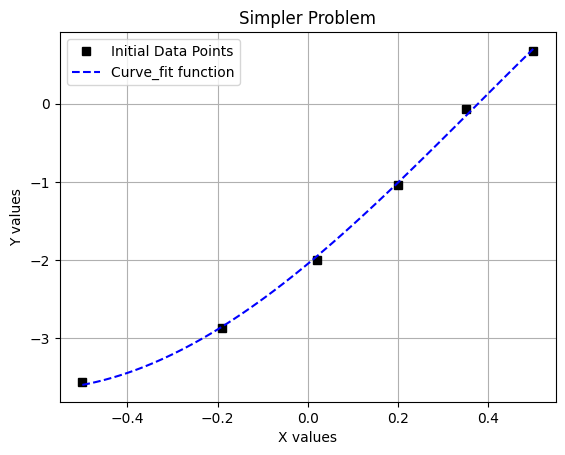

In [ ]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define our sets of data
xdata = np.array([-0.5, -0.19, 0.02, 0.20, 0.35, 0.50])
ydata = np.array([-3.558, -2.874, -1.995, -1.040, -0.068, 0.677])

# Define our function
def function (x,A,B):
  return A*np.sin(np.pi*x/2)+B*np.cos(np.pi*x/2)

# Use curve fit
popt,pcov = curve_fit(function,xdata,ydata)

# Define a new set of data from our curve fit function
xfit = np.linspace(-0.5,0.5,100)
yfit = function(xfit,*popt)

# Plot the initial data and our fit data
plt.plot(xdata,ydata,'ks', label = 'Initial Data Points')
plt.plot(xfit,yfit,'b--' , label = 'Curve_fit function')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid()
plt.title('Simpler Problem')
plt.show()

### Little tougher problem

Say we want to fit a guassian curve as follows :  $f(x; a, \mu, \sigma) = a \cdot \exp\left( -\frac{(x - \mu)^2}{2 \sigma^2} \right)$
where the variables $a , \mu, \sigma $ are our parameters


We are given a set of data points from a file of data.
https://raw.githubusercontent.com/mdaugherity/Numerical2024/refs/heads/main/fits/g1.txt

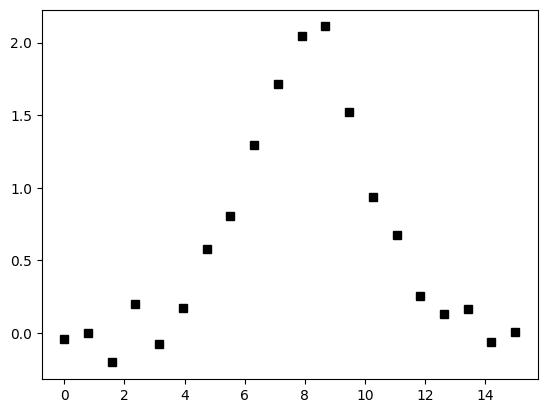

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xdata, ydata = np.loadtxt('https://raw.githubusercontent.com/mdaugherity/Numerical2024/refs/heads/main/fits/g1.txt')
plt.plot(xdata,ydata,'ks', label = 'Initial Data Points')
plt.show()

This problem does not look too difficult. We can pretty easily visualize what our final curve should look like, but curve fit will have a little tougher problem with it.

Best Pars:  [-0.39690569  1.36681492 -0.1825389 ]


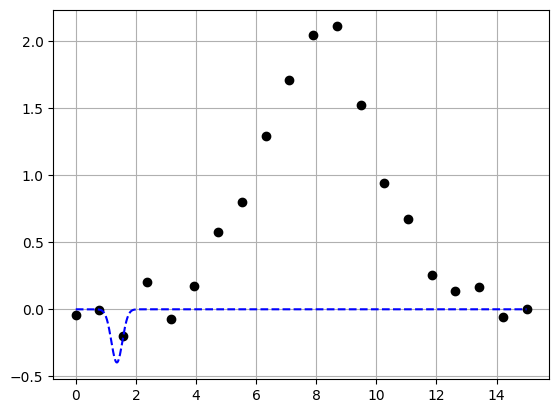

In [ ]:
def gausfit(x,a,mu,sig):
  return a*np.exp(-1.0* (x-mu)**2/(2*sig**2))

popt, pcov = curve_fit(gausfit, xdata, ydata)
print('Best Pars: ',popt)

xfit = np.linspace(0,15,1000)
yfit = gausfit(xfit, *popt)

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit,'b--')
plt.grid()
plt.show()

Here, we see that curve_fit has failed terribly. This is because many times, we will need to offer curve fit an initial guess of what we think the parameters may be. This is also why it's good to plot your initial data points first, to give you a good sense of what your answer may come out to be

Best Pars:  [2.05754404 8.08991573 1.88702082]


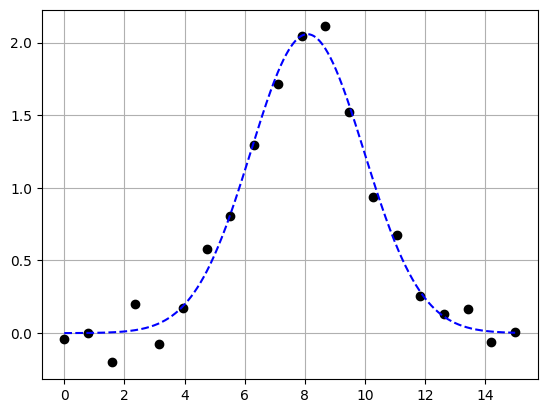

In [ ]:
# This is out initial guess
p0 = np.array([2,8,4])

popt, pcov = curve_fit(gausfit, xdata, ydata,p0)
print('Best Pars: ',popt)

xfit = np.linspace(0,15,1000)
yfit = gausfit(xfit, *popt)

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit,'b--')
plt.grid()
plt.show()

This curve fit looks much better, because we gave the function a good starting point this time.

## Possible Errors

This section covers many different possible errors you could come across when using curve_fit

### Different sized arrays

Here, python gave us an error because we had a different number of x points and y points

In [ ]:
def func(x, a, b):
  return a * x + b

xpoints = np.array([ -0.19, 0.02, 0.20, 0.35, 0.50])
ypoints = np.array([-3.558, -2.874, -1.995, -1.040, -0.068, 0.677])

popt, pcov = curve_fit(func, xpoints, ypoints)   # Define your popt and pcov
print(popt)

ValueError: operands could not be broadcast together with shapes (5,) (6,) 

### Wrong number of parameters

Here, we got an error because we had three parameters in our function, but had an initial guess with only two parameters

In [ ]:
def func(x, a, b , c):
  return a * x + b**c


p0 = [5,10]

xpoints = np.array([-0.5, -0.19, 0.02, 0.20, 0.35, 0.50])
ypoints = np.array([-3.558, -2.874, -1.995, -1.040, -0.068, 0.677])

popt, pcov = curve_fit(func, xpoints , ypoints, p0)
print(popt)

TypeError: func() missing 1 required positional argument: 'c'

### Curve_fit Messed up

Here, python did not actually give us an error, but if we don't plot our answer, we see that curve_fit did not fit the function properly.

Best Pars:  [-0.39690569  1.36681492 -0.1825389 ]


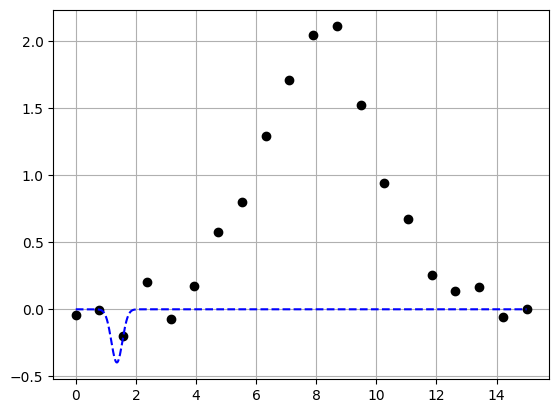

In [ ]:
xdata, ydata = np.loadtxt('https://raw.githubusercontent.com/mdaugherity/Numerical2024/refs/heads/main/fits/g1.txt')
def gausfit(x,a,mu,sig):
  return a*np.exp(-1.0* (x-mu)**2/(2*sig**2))

popt, pcov = curve_fit(gausfit, xdata, ydata)
print('Best Pars: ',popt)

xfit = np.linspace(0,15,1000)
yfit = gausfit(xfit, *popt)

plt.plot(xdata,ydata,'ko')
plt.plot(xfit,yfit,'b--')
plt.grid()
plt.show()

### Not having x as our first parameter

This is another tricky error, because we don't actually get an error back, but since we defined our function with the order a , x , b, curve fit was actually adjusting the value of x and b, thinking that a was our independent variable, ultimately giving us the wrong answer.

In [ ]:
 # Define the function you are trying to fit
def func(a, x, b):
  return a * x + b

# This is if you need to make an initial guess to give the code a good starting guess.
p0 = [0,0]

# Use this if you are given specific data points
xpoints = np.array([-0.5, -0.19, 0.02, 0.20, 0.35, 0.50])
ypoints = np.array([-3.558, -2.874, -1.995, -1.040, -0.068, 0.677])

popt, pcov = curve_fit(func, xpoints , ypoints)   # Define your popt and pcov
print(popt)

[ 4.37504939 -1.75341979]
